# Week 3 - Classification

Assignment by Chu Zhuang

* Because of the low speed of running several algorithms, I opened side file to run each cell which are hard to copy back to this document. Therefore, in this homework, I just included the cells relevant to answering homework questions.Many Thanks!

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [4]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

Summary for classifiers on artifical datasets:

* For Gradient Boosting method, it works best with multiple bolbs dataset and xor split dataset, even with noise. Since it is a relative complex model which makes progress on each model before, it could capture more complex and non-linear relationship among data.


* For Random Forest, its performance is very close to Gradient Boosting method, both of which are ensemble methods; while generally performs worse than gradient boosting methods, which improves performance by modifying the model step by step. Also, for Decision Tree classifier, which is the most naive form of these two ensemble classifiers, perform similarly with these two methors but generally even worse. 


* SVM methods performs good on blobs and andsplit datasets, which all have clear boundaries between categories; while SVM is very poor at nested data, like target sample dataset, and XOR sample dataset, which corresponds the calcualtion assumption of SVM to find the 'boundary' which maximizes the margins between training data and the boundary. Because for nested data, the boundary is especially difficult to draw for SVM classifier. 


* Logistic Regression performs best in andsplit dataset, while generally poor for all the other nonlinear one, like xor-slit, target-split and blobs ones. Logsitic regression is modified based on linear regression, therefore is only robost when there are linear relationship among features of data. 


* Overall, kNN performs very well in andsplit, xorsplit, target split, and blobs datasets, which all have kind of clear boundaries and data are clustered in groups; while kNN does not perform while when the data are at random or with higher noisee. Since kNN is directly influenced by the closest K number of cases, it is easily influenced by noises in the data.


*  Neural Network overall performs very well, which corresponds with our expectations.It performs the best across all datasets, whether it is more linearly separated or not, and it is also most robost to noises that even under large noise, it still outforms all the other classifiers, because of its higher level of representation of data.  


* Naive Bayes generally performs well across datasets. It is very robust because it does not assume any relationship or shape of features. It performs best in target-sample dataset, when the data points are nested; while it does not perform well in xor-split dataset. I guess the reason might be that the two features or not independent with each other in this dataset, which violates the assumption of naive bayes.

Summary for classifiers on real datasets:

* For Gradient Boosting method, it works best with almost all datasets, considering its boosting nature which modifies the classifier step by step; however, it does not perform well for the spam email dataset, especially badly with the 'spam' email, compared with 'not spam'. Moreover, compared with other methods, like decision tree-its naive form, it performs even worse, which is kind of contraditory with our prediction and hard to explain. 


* For Random Forest, it works generally good with all dataests and perform close to Gradient Boosting method, since both of them are ensemble methods. However, since Random Forest is only based on majority voting, compared with Gradient Boosting classifier, it performs a little worse.


* Generally, decision Tree classifer performs well but less ideal than randomn forest and gradient boosting classifiers. Very interesting, decision tree performs extremely well on the senate large dataset, and even outperforms every other classifiers, including neural network. The reasons might be that decision tree classifier is more sensitive to data which have a nested structure. 


* SVM linear generally performs very well. Except for the email spam dataset, in all other dataset, it all reaches an AUC above 0.90, which is very high. The bad performance in email spam dataset might largely the result of noise data structure in this dataset. However, for SVM poly classifier, in all these dataset, SVM poly performs not ideally. I think the reason might be that categories in all these dataset are more clearly linearly separated.  


* Logistic Regression generally performs well in all these datasets as well. At many occasions, it outperforms decision tree and kNN classifiers, corresponding with my guess that data in these datasets are more linearly separated by categores. Logistic Regression performs best in reddit dataset, which clearly shows a linear relationship; and performs worse in senate_large dataset, of which decision tree shows a better performance, which is nested and less linearly separated.


* Overall, kNN performs not very ideal,because of the noises from the real dataset. It performs better when there are only two categories. It performs much worse when the number of categories increase. It is not very robust to multi-categories classification. Also, it performs worse when there are more noises in the data which blurrs the boundary between categories, for example, it performs extremely bad in the newsgroup dataset.  


* Neural Network overall performs very well, which corresponds with our expectations. Because of nonlinearity and hidden layers, neural network could better represent information encoded in the dataset. AUC of neural network classifier are generally close to 1, except for the email spam dataset. However, even for this dataset, very un-ideal category--'spam' email, it reaches an averaged 0.64 precision, highest among all classifiers.  


* Naive Bayes performs genearlly well and is robost across datasets.It performs extremely well in email_spam dataset, close to neural network and outforms many other advanced classifiers. The reason might be the non-assumption about the feature space, which is quite anomalous and sparse based on the visualization; while naive bayes does not rely on the shapes or distances of features, but only relies on their conditional probability between feature and response. Naive Bayes is robust to different feature spaces.  However, it does no perform well in senate datasets, which might be resulted from the less independence among features of this dataset (biasly nested).

In [260]:
#Generate artifical datasets: random, split*3, blobs
#also generate above datasets with differnt level of noises
#resulting in 10 articifical datasets

noise = .2  #0.8

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

In [262]:
#machine learning algorithm
#Bayes
clf1 = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf2 = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf3 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf4 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf5 = sklearn.linear_model.LogisticRegression()

#Symbolists
clf6 = sklearn.tree.DecisionTreeClassifier()
clf7 = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf8 = sklearn.neural_network.MLPClassifier()

#Ensemble
clf9 = sklearn.ensemble.GradientBoostingClassifier()

In [263]:
clf1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
pd0=lucem_illud_2020.evaluateClassifier(clf1, dfTest)
pd0['methods']='Naive Bayes' #need to correct
pd_random_sample=pd0

In [264]:
#Run all the fitting and evluation codes at the same time 
#for each dataset and save them as csv
clf2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
clf3.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
clf4.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
clf5.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
clf6.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
clf7.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
clf8.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
clf9.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

pd=pd_random_sample
pd0=lucem_illud_2020.evaluateClassifier(clf2, dfTest)
pd0['methods']='SVM linear' #need to correct
pd=pandas.concat([pd0,pd])
pd0=lucem_illud_2020.evaluateClassifier(clf3, dfTest)
pd0['methods']='SVM poly' #need to correct
pd=pandas.concat([pd0,pd])
pd0=lucem_illud_2020.evaluateClassifier(clf4, dfTest)
pd0['methods']='kNN' #need to correct
pd=pandas.concat([pd0,pd])
pd0=lucem_illud_2020.evaluateClassifier(clf5, dfTest)
pd0['methods']='Logistic Regression' #need to correct
pd=pandas.concat([pd0,pd])
pd0=lucem_illud_2020.evaluateClassifier(clf6, dfTest)
pd0['methods']='Decision Tree' #need to correct
pd=pandas.concat([pd0,pd])
pd0=lucem_illud_2020.evaluateClassifier(clf7, dfTest)
pd0['methods']='Random Forest' #need to correct
pd=pandas.concat([pd0,pd])
pd0=lucem_illud_2020.evaluateClassifier(clf8, dfTest)
pd0['methods']='Neural Network' #need to correct
pd=pandas.concat([pd0,pd])
pd0=lucem_illud_2020.evaluateClassifier(clf9, dfTest)
pd0['methods']='Gradient Boosting' #need to correct
pd=pandas.concat([pd0,pd])

pd_random_sample=pd
pd_random_sample

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
Category,,,,,,
0,0.485,0.518687,0.467290,0.459605,0.555556,Gradient Boosting
1,0.485,0.518687,0.569892,0.559585,0.481818,Gradient Boosting
0,0.510,0.518182,0.461538,0.459231,0.800000,Neural Network
1,0.510,0.518182,0.590909,0.559669,0.236364,Neural Network
0,0.525,0.483333,0.435897,0.442009,0.566667,Random Forest
1,0.525,0.483333,0.530120,0.542048,0.400000,Random Forest
0,0.570,0.428283,0.377551,0.420215,0.411111,Decision Tree
1,0.570,0.428283,0.480392,0.518993,0.445455,Decision Tree
0,0.480,0.543434,0.479452,0.472907,0.777778,Logistic Regression


In [267]:
#example-random_sample, with 0.2 noise, evaluation scores
lucem_illud_2020.evaluateClassifier(clf1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.505,0.521717,0.464052,0.461086,0.788889
1,0.505,0.521717,0.595745,0.561644,0.254545


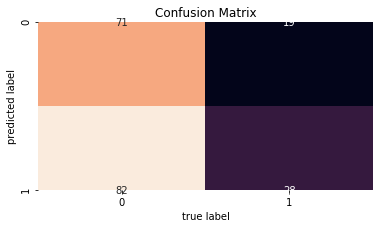

In [265]:
#example-random_sample, with 0.2 noise, confusion matrix
lucem_illud_2020.plotConfusionMatrix(clf1, dfTest)

* While I have a question that, in this ROC curve, the AUC score calculated here(noted in the legend)is different from the one in the table above?

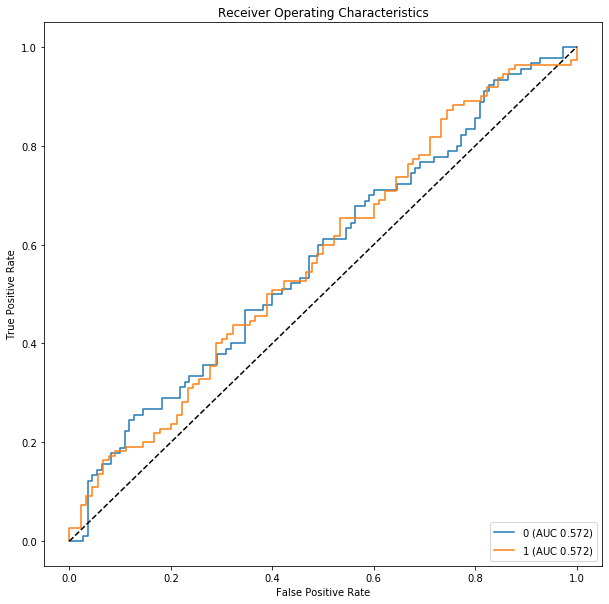

In [266]:
#example-random_sample, with 0.2 noise, ROC
lucem_illud_2020.plotMultiROC(clf1, dfTest)

Based on the codes above, I run for each artifical dataset and save all the evaluation score table as csv file and reload them below: 

In [268]:
pd_blobs_mn=pandas.read_csv('blob_mn.csv')
pd_targetsplit_mn=pandas.read_csv('targetsplit_mn.csv')  
pd_xorsplit_mn=pandas.read_csv('xorsplit_mn.csv')  
pd_andsplit_mn=pandas.read_csv('andsplit_mn.csv')  
pd_random_sample_mn=pandas.read_csv('random_sample_mn.csv') 
pd_multiblob=pandas.read_csv('pd_multiblob.csv')
pd_target_sample=pandas.read_csv('pd_target_sample.csv')
pd_xorsplit=pandas.read_csv('pd_xorsplit.csv')
pd_andsplit=pandas.read_csv('pd_andsplit')
pd_random_sample=pandas.read_csv('pd_random_sample')

Summary for classifiers on artifical datasets:

* For Gradient Boosting method, it works best with multiple bolbs dataset and xor split dataset, even with noise. Since it is a relative complex model which makes progress on each model before, it could capture more complex and non-linear relationship among data.


* For Random Forest, its performance is very close to Gradient Boosting method, both of which are ensemble methods; while generally performs worse than gradient boosting methods, which improves performance by modifying the model step by step. Also, for Decision Tree classifier, which is the most naive form of these two ensemble classifiers, perform similarly with these two methors but generally even worse. 


* SVM methods performs good on blobs and andsplit datasets, which all have clear boundaries between categories; while SVM is very poor at nested data, like target sample dataset, and XOR sample dataset, which corresponds the calcualtion assumption of SVM to find the 'boundary' which maximizes the margins between training data and the boundary. Because for nested data, the boundary is especially difficult to draw for SVM classifier. 


* Logistic Regression performs best in andsplit dataset, while generally poor for all the other nonlinear one, like xor-slit, target-split and blobs ones. Logsitic regression is modified based on linear regression, therefore is only robost when there are linear relationship among features of data. 


* Overall, kNN performs very well in andsplit, xorsplit, target split, and blobs datasets, which all have kind of clear boundaries and data are clustered in groups; while kNN does not perform while when the data are at random or with higher noisee. Since kNN is directly influenced by the closest K number of cases, it is easily influenced by noises in the data.


*  Neural Network overall performs very well, which corresponds with our expectations.It performs the best across all datasets, whether it is more linearly separated or not, and it is also most robost to noises that even under large noise, it still outforms all the other classifiers, because of its higher level of representation of data.  


* Naive Bayes generally performs well across datasets. It is very robust because it does not assume any relationship or shape of features. It performs best in target-sample dataset, when the data points are nested; while it does not perform well in xor-split dataset. I guess the reason might be that the two features or not independent with each other in this dataset, which violates the assumption of naive bayes.

In [269]:
pd_blobs_mn

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.120,0.865497,0.640000,0.568947,0.842105,Gradient Boosting
1,1,0.168,0.721004,0.622222,0.428721,0.528302,Gradient Boosting
2,2,0.152,0.723288,0.625000,0.417521,0.520833,Gradient Boosting
3,3,0.150,0.770889,0.631068,0.476151,0.637255,Gradient Boosting
4,4,0.154,0.763009,0.617647,0.461265,0.623762,Gradient Boosting
5,0,0.110,0.875699,0.663934,0.594091,0.852632,Neural Network
6,1,0.184,0.703956,0.574468,0.396654,0.509434,Neural Network
7,2,0.164,0.703950,0.587500,0.385630,0.489583,Neural Network
8,3,0.142,0.783205,0.650485,0.497280,0.656863,Neural Network
9,4,0.148,0.770466,0.633663,0.475529,0.633663,Neural Network


In [271]:
pd_multiblob

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.002,0.994949,1.000000,0.991899,0.989899,Gradient Boosting
1,1,0.142,0.787764,0.660377,0.510252,0.666667,Gradient Boosting
2,2,0.008,0.990786,0.967391,0.958643,0.988889,Gradient Boosting
3,3,0.006,0.989465,0.990654,0.976309,0.981481,Gradient Boosting
4,4,0.142,0.772794,0.639175,0.476376,0.632653,Gradient Boosting
5,0,0.002,0.994949,1.000000,0.991899,0.989899,Neural Network
6,1,0.122,0.800422,0.729167,0.556111,0.666667,Neural Network
7,2,0.008,0.990786,0.967391,0.958643,0.988889,Neural Network
8,3,0.006,0.989465,0.990654,0.976309,0.981481,Neural Network
9,4,0.122,0.823815,0.672897,0.546373,0.734694,Neural Network


In [272]:
pd_targetsplit_mn

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.470,0.527244,0.543860,0.534224,0.596154,Gradient Boosting
1,1,0.470,0.527244,0.511628,0.494496,0.458333,Gradient Boosting
2,0,0.435,0.564503,0.582524,0.556072,0.576923,Neural Network
3,1,0.435,0.564503,0.546392,0.516654,0.552083,Neural Network
4,0,0.515,0.483974,0.504762,0.512234,0.509615,Random Forest
5,1,0.515,0.483974,0.463158,0.472281,0.458333,Random Forest
6,0,0.495,0.505208,0.525253,0.522626,0.500000,Decision Tree
7,1,0.495,0.505208,0.485149,0.482628,0.510417,Decision Tree
8,0,0.460,0.546875,0.590909,0.546591,0.375000,Logistic Regression
9,1,0.460,0.546875,0.514925,0.505103,0.718750,Logistic Regression


In [273]:
pd_target_sample

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.135,0.864446,0.850467,0.813750,0.892157,Gradient Boosting
1,1,0.135,0.864446,0.881720,0.817766,0.836735,Gradient Boosting
2,0,0.110,0.888355,0.838983,0.829307,0.970588,Neural Network
3,1,0.110,0.888355,0.963415,0.871630,0.806122,Neural Network
4,0,0.140,0.858743,0.824561,0.799890,0.921569,Random Forest
5,1,0.140,0.858743,0.906977,0.821879,0.795918,Random Forest
6,0,0.165,0.834834,0.834951,0.783979,0.843137,Decision Tree
7,1,0.165,0.834834,0.835052,0.775196,0.826531,Decision Tree
8,0,0.565,0.436275,0.436782,0.482723,0.372549,Logistic Regression
9,1,0.565,0.436275,0.433628,0.461814,0.500000,Logistic Regression


In [274]:
pd_random_sample_mn

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.535,0.465777,0.494845,0.514081,0.452830,Gradient Boosting
1,1,0.535,0.465777,0.436893,0.454151,0.478723,Gradient Boosting
2,0,0.595,0.406764,0.430108,0.492305,0.377358,Neural Network
3,1,0.595,0.406764,0.383178,0.432131,0.436170,Neural Network
4,0,0.445,0.549478,0.571429,0.556577,0.641509,Random Forest
5,1,0.445,0.549478,0.530864,0.497842,0.457447,Random Forest
6,0,0.455,0.541248,0.566372,0.551960,0.603774,Decision Tree
7,1,0.455,0.541248,0.517241,0.492616,0.478723,Decision Tree
8,0,0.565,0.442292,0.453333,0.505409,0.320755,Logistic Regression
9,1,0.565,0.442292,0.424000,0.444064,0.563830,Logistic Regression


In [275]:
pd_random_sample

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.520,0.478931,0.495327,0.504877,0.514563,Gradient Boosting
1,1,0.520,0.478931,0.462366,0.474966,0.443299,Gradient Boosting
2,0,0.520,0.484936,0.492537,0.507803,0.320388,Neural Network
3,1,0.520,0.484936,0.473684,0.477651,0.649485,Neural Network
4,0,0.470,0.526274,0.536000,0.528660,0.650485,Random Forest
5,1,0.470,0.526274,0.520000,0.499072,0.402062,Random Forest
6,0,0.515,0.483785,0.500000,0.507136,0.524272,Decision Tree
7,1,0.515,0.483785,0.467391,0.477194,0.443299,Decision Tree
8,0,0.450,0.555900,0.606557,0.547890,0.359223,Logistic Regression
9,1,0.450,0.555900,0.525180,0.515238,0.752577,Logistic Regression


In [276]:
pd_xorsplit_mn

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.335,0.664367,0.714286,0.663316,0.669643,Gradient Boosting
1,1,0.335,0.664367,0.610526,0.552392,0.659091,Gradient Boosting
2,0,0.320,0.678977,0.726415,0.674410,0.687500,Neural Network
3,1,0.320,0.678977,0.627660,0.565817,0.670455,Neural Network
4,0,0.375,0.615260,0.655462,0.626483,0.696429,Random Forest
5,1,0.375,0.615260,0.580247,0.514905,0.534091,Random Forest
6,0,0.350,0.644886,0.687500,0.647656,0.687500,Decision Tree
7,1,0.350,0.644886,0.602273,0.537732,0.602273,Decision Tree
8,0,0.515,0.515828,0.591837,0.568243,0.258929,Logistic Regression
9,1,0.515,0.515828,0.450331,0.447983,0.772727,Logistic Regression


In [290]:
pd_andsplit

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.110,0.889022,0.879630,0.848508,0.913462,Gradient Boosting
1,1,0.110,0.889022,0.902174,0.845005,0.864583,Gradient Boosting
2,0,0.085,0.913061,0.884956,0.870919,0.961538,Neural Network
3,1,0.085,0.913061,0.954023,0.889832,0.864583,Neural Network
4,0,0.105,0.894231,0.887850,0.856017,0.913462,Random Forest
5,1,0.105,0.894231,0.903226,0.850323,0.875000,Random Forest
6,0,0.105,0.894231,0.887850,0.856017,0.913462,Random Tree
7,1,0.105,0.894231,0.903226,0.850323,0.875000,Random Tree
8,0,0.120,0.879407,0.877358,0.839561,0.894231,Decision Tree
9,1,0.120,0.879407,0.882979,0.828409,0.864583,Decision Tree


In [278]:
pd_xorsplit

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.090,0.912371,0.949495,0.899136,0.878505,Gradient Boosting
1,1,0.090,0.912371,0.871287,0.849444,0.946237,Gradient Boosting
2,0,0.080,0.921013,0.941748,0.903734,0.906542,Neural Network
3,1,0.080,0.921013,0.896907,0.869042,0.935484,Neural Network
4,0,0.090,0.910260,0.923810,0.887472,0.906542,Random Forest
5,1,0.090,0.910260,0.894737,0.857770,0.913978,Random Forest
6,0,0.110,0.889458,0.897196,0.859961,0.897196,Decision Tree
7,1,0.110,0.889458,0.881720,0.832431,0.881720,Decision Tree
8,0,0.605,0.409255,0.379310,0.502989,0.205607,Logistic Regression
9,1,0.605,0.409255,0.401408,0.426025,0.612903,Logistic Regression


In [279]:
pd_andsplit_mn

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.465,0.535,0.538462,0.518846,0.49,Gradient Boosting
1,1,0.465,0.535,0.532110,0.518624,0.58,Gradient Boosting
2,0,0.405,0.595,0.623377,0.559221,0.48,Neural Network
3,1,0.405,0.595,0.577236,0.554837,0.71,Neural Network
4,0,0.445,0.555,0.560440,0.530824,0.51,Random Forest
5,1,0.445,0.555,0.550459,0.530275,0.60,Random Forest
6,0,0.505,0.495,0.494949,0.497525,0.49,Decision Tree
7,1,0.505,0.495,0.495050,0.497525,0.50,Decision Tree
8,0,0.420,0.580,0.602564,0.548205,0.47,Logistic Regression
9,1,0.420,0.580,0.565574,0.545246,0.69,Logistic Regression


The same procedure was done for the 5 real datasets as well, demonstrated below:

Summary for classifiers on real datasets:

* For Gradient Boosting method, it works best with almost all datasets, considering its boosting nature which modifies the classifier step by step; however, it does not perform well for the spam email dataset, especially badly with the 'spam' email, compared with 'not spam'. Moreover, compared with other methods, like decision tree-its naive form, it performs even worse, which is kind of contraditory with our prediction and hard to explain. 


* For Random Forest, it works generally good with all dataests and perform close to Gradient Boosting method, since both of them are ensemble methods. However, since Random Forest is only based on majority voting, compared with Gradient Boosting classifier, it performs a little worse.


* Generally, decision Tree classifer performs well but less ideal than randomn forest and gradient boosting classifiers. Very interesting, decision tree performs extremely well on the senate large dataset, and even outperforms every other classifiers, including neural network. The reasons might be that decision tree classifier is more sensitive to data which have a nested structure. 


* SVM linear generally performs very well. Except for the email spam dataset, in all other dataset, it all reaches an AUC above 0.90, which is very high. The bad performance in email spam dataset might largely the result of noise data structure in this dataset. However, for SVM poly classifier, in all these dataset, SVM poly performs not ideally. I think the reason might be that categories in all these dataset are more clearly linearly separated.  


* Logistic Regression generally performs well in all these datasets as well. At many occasions, it outperforms decision tree and kNN classifiers, corresponding with my guess that data in these datasets are more linearly separated by categores. Logistic Regression performs best in reddit dataset, which clearly shows a linear relationship; and performs worse in senate_large dataset, of which decision tree shows a better performance, which is nested and less linearly separated.


* Overall, kNN performs not very ideal,because of the noises from the real dataset. It performs better when there are only two categories. It performs much worse when the number of categories increase. It is not very robust to multi-categories classification. Also, it performs worse when there are more noises in the data which blurrs the boundary between categories, for example, it performs extremely bad in the newsgroup dataset.  


* Neural Network overall performs very well, which corresponds with our expectations. Because of nonlinearity and hidden layers, neural network could better represent information encoded in the dataset. AUC of neural network classifier are generally close to 1, except for the email spam dataset. However, even for this dataset, very un-ideal category--'spam' email, it reaches an averaged 0.64 precision, highest among all classifiers.  


* Naive Bayes performs genearlly well and is robost across datasets.It performs extremely well in email_spam dataset, close to neural network and outforms many other advanced classifiers. The reason might be the non-assumption about the feature space, which is quite anomalous and sparse based on the visualization; while naive bayes does not rely on the shapes or distances of features, but only relies on their conditional probability between feature and response. Naive Bayes is robust to different feature spaces.  However, it does no perform well in senate datasets, which might be resulted from the less independence among features of this dataset (biasly nested).

In [280]:
pd_spam=pandas.read_csv('pd_spam')
pd_senate_large=pandas.read_csv('pd_senate_large')
pd_senate_email=pandas.read_csv('pd_senate_email.csv')
pd_newsgroup=pandas.read_csv('pd_newsgroup.csv')
pd_reddit=pandas.read_csv('pd_reddit.csv')

In [285]:
pd_reddit

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,Relationships,0.025078,0.983264,0.909091,0.909091,1.000000,Gradient Boosting
1,Tales From Tech Support,0.021944,0.970546,0.965116,0.933282,0.954023,Gradient Boosting
2,Bad Roommates,0.025078,0.952479,0.985915,0.918230,0.909091,Gradient Boosting
3,Weeaboo Tales,0.009404,0.984617,0.986486,0.966450,0.973333,Gradient Boosting
4,Relationships,0.012539,0.987474,0.963415,0.954507,0.987500,Neural Network
5,Tales From Tech Support,0.009404,0.993534,0.966667,0.966667,1.000000,Neural Network
6,Bad Roommates,0.015674,0.967532,1.000000,0.950739,0.935065,Neural Network
7,Weeaboo Tales,0.006270,0.991284,0.986667,0.976646,0.986667,Neural Network
8,Relationships,0.065831,0.947751,0.804124,0.790290,0.975000,Random Forest
9,Tales From Tech Support,0.047022,0.920977,0.973684,0.868944,0.850575,Random Forest


In [284]:
pd_newsgroup

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,Relationships,0.025078,0.983264,0.909091,0.909091,1.000000,Naive Bayes
1,Tales From Tech Support,0.021944,0.970546,0.965116,0.933282,0.954023,Naive Bayes
2,Bad Roommates,0.025078,0.952479,0.985915,0.918230,0.909091,Naive Bayes
3,Weeaboo Tales,0.009404,0.984617,0.986486,0.966450,0.973333,Naive Bayes
4,comp.sys.mac.hardware,0.095745,0.843973,0.843750,0.679539,0.729730,Gradient Boosting
5,misc.forsale,0.095745,0.855629,0.803922,0.669281,0.766355,Gradient Boosting
6,comp.windows.x,0.068085,0.905430,0.901639,0.805479,0.846154,Gradient Boosting
7,rec.autos,0.097872,0.909954,0.753333,0.716908,0.926230,Gradient Boosting
8,comp.sys.mac.hardware,0.065957,0.891478,0.900000,0.774411,0.810811,Neural Network
9,misc.forsale,0.068085,0.913082,0.831858,0.758451,0.878505,Neural Network


In [283]:
pd_senate_email

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,Obama,0.005865,0.993990,0.993056,0.989092,0.993056,Gradient Boosting
1,Clinton,0.005865,0.993990,0.994924,0.992806,0.994924,Gradient Boosting
2,Obama,0.049853,0.952182,0.920530,0.903230,0.965278,Neural Network
3,Clinton,0.049853,0.952182,0.973684,0.949564,0.939086,Neural Network
4,Obama,0.017595,0.979167,1.000000,0.975929,0.958333,Random Forest
5,Clinton,0.017595,0.979167,0.970443,0.970443,1.000000,Random Forest
6,Obama,0.008798,0.991452,0.986207,0.982291,0.993056,Decision Tree
7,Clinton,0.008798,0.991452,0.994898,0.990663,0.989848,Decision Tree
8,Obama,0.020528,0.975694,1.000000,0.971917,0.951389,Logistic Regression
9,Clinton,0.020528,0.975694,0.965686,0.965686,1.000000,Logistic Regression


In [282]:
pd_senate_large

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,Kennedy,0.001282,0.998934,0.996795,0.996795,1.000000,Gradient Boosting
1,Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000,Gradient Boosting
2,Kohl,0.001282,0.993056,1.000000,0.987393,0.986111,Gradient Boosting
3,Kerry,0.000000,1.000000,1.000000,1.000000,1.000000,Gradient Boosting
4,Kyl,0.000000,1.000000,1.000000,1.000000,1.000000,Gradient Boosting
5,Kennedy,0.038462,0.964767,0.927052,0.916859,0.980707,Neural Network
6,Klobuchar,0.006410,0.965972,0.982456,0.922087,0.933333,Neural Network
7,Kohl,0.006410,0.965278,1.000000,0.936966,0.930556,Neural Network
8,Kerry,0.037179,0.948929,0.947867,0.892680,0.917431,Neural Network
9,Kyl,0.006410,0.982437,0.991379,0.963184,0.966387,Neural Network


In [281]:
pd_spam

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,not spam,0.112573,0.611392,0.885023,0.884974,0.998294,Gradient Boosting
1,spam,0.112573,0.611392,0.956522,0.325840,0.224490,Gradient Boosting
2,not spam,0.064327,0.847740,0.954698,0.951856,0.970990,Neural Network
3,spam,0.064327,0.847740,0.806818,0.624005,0.724490,Neural Network
4,not spam,0.080409,0.778871,0.933116,0.931291,0.976109,Random Forest
5,spam,0.080409,0.778871,0.802817,0.526886,0.581633,Random Forest
6,not spam,0.073099,0.812879,0.943709,0.941334,0.972696,Decision Tree
7,spam,0.073099,0.812879,0.800000,0.572157,0.653061,Decision Tree
8,not spam,0.106725,0.640297,0.892802,0.892618,0.994881,Logistic Regression
9,spam,0.106725,0.640297,0.903226,0.360404,0.285714,Logistic Regression


<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In the cell below, I tried the AdaBoost classifier on target-split dataset and the Reddit dataset. It is another more advanced ensemble classifier, which trains a new 'weak' model based on the cases categorized as wrong in all previous models and combines (voting) the results of all the 'weak' models trained for the results. Each time, it will only update one weak model. Because of this detailed consideration of 'weakness' and 'strengthness' of all previous models, I predict that the performance of AdaBoost classifier should be better than gradient boosting classifier or close to it, in both the artificial dataset (most complicated nested one, target-sample) and real dataset (reddit).

In [ ]:
#load the target split artificial dataset
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))

In [293]:
#fit in the adaboost classifier
clf=sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50,learning_rate=1.0)
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [294]:
#print the evaluation scores
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.085,0.914773,0.916667,0.876615,0.907216
1,0.085,0.914773,0.913462,0.882513,0.922330


From the artifical dataset: target_sample, we could see Adaboost outperforms all the classifiers previously and have a precision rate over 0.90.

In [291]:
#compare with other classifiers
pd_target_sample

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,0,0.135,0.864446,0.850467,0.813750,0.892157,Gradient Boosting
1,1,0.135,0.864446,0.881720,0.817766,0.836735,Gradient Boosting
2,0,0.110,0.888355,0.838983,0.829307,0.970588,Neural Network
3,1,0.110,0.888355,0.963415,0.871630,0.806122,Neural Network
4,0,0.140,0.858743,0.824561,0.799890,0.921569,Random Forest
5,1,0.140,0.858743,0.906977,0.821879,0.795918,Random Forest
6,0,0.165,0.834834,0.834951,0.783979,0.843137,Decision Tree
7,1,0.165,0.834834,0.835052,0.775196,0.826531,Decision Tree
8,0,0.565,0.436275,0.436782,0.482723,0.372549,Logistic Regression
9,1,0.565,0.436275,0.433628,0.461814,0.500000,Logistic Regression


Now try on real dataset for adaboost algorithm: 

In [300]:
#load the Reddit dataset
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())

Loading Reddit data
Converting to vectors


In [301]:
clf=sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50,learning_rate=1.0)
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [302]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Bad Roommates,0.106583,0.854949,0.841463,0.710953,0.766667
Relationships,0.065831,0.918038,0.853659,0.784619,0.886076
Tales From Tech Support,0.084639,0.903115,0.785714,0.719642,0.880000
Weeaboo Tales,0.025078,0.955902,0.971831,0.912893,0.920000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

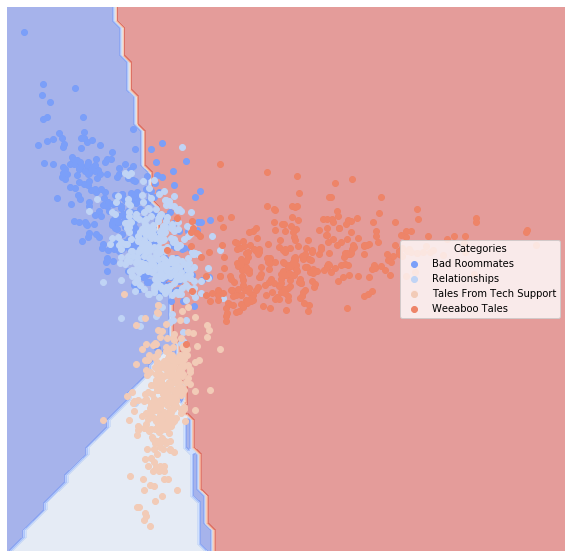

In [303]:
lucem_illud_2020.plotregions(clf, dfTrain)

* However, for the Reddit dataset, from the comparison of the two tables, we see that the performance of the Adaboost algorithm is not better than gradient boosting and even worse than the decision tree model, which might suggest that the robustness of this algorithm in real data with more noise is not ideal. 

* Another guess might be that this model might overfit the training dataset, with detailed consideration of each wrong case of each model. As we can see in the figure above, there is a short light blue region in the upper part, which is too narrow to be assigned and apparently come from overfitting. 

In [289]:
#compare with results of other classifiers
pd_reddit

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
0,Relationships,0.025078,0.983264,0.909091,0.909091,1.000000,Gradient Boosting
1,Tales From Tech Support,0.021944,0.970546,0.965116,0.933282,0.954023,Gradient Boosting
2,Bad Roommates,0.025078,0.952479,0.985915,0.918230,0.909091,Gradient Boosting
3,Weeaboo Tales,0.009404,0.984617,0.986486,0.966450,0.973333,Gradient Boosting
4,Relationships,0.012539,0.987474,0.963415,0.954507,0.987500,Neural Network
5,Tales From Tech Support,0.009404,0.993534,0.966667,0.966667,1.000000,Neural Network
6,Bad Roommates,0.015674,0.967532,1.000000,0.950739,0.935065,Neural Network
7,Weeaboo Tales,0.006270,0.991284,0.986667,0.976646,0.986667,Neural Network
8,Relationships,0.065831,0.947751,0.804124,0.790290,0.975000,Random Forest
9,Tales From Tech Support,0.047022,0.920977,0.973684,0.868944,0.850575,Random Forest


## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.

In [6]:
#load the data
#open the file and read it by lines
text_file='amazon_alexa.txt'
with open(text_file, encoding='utf-8') as f:
    lines=f.readlines()

In [7]:
#construct lists to store the original data organized
txt_rating=[]
txt_date=[]
txt_variation=[]
txt_review=[]

#read each line (from the second line) in the txt and split items by tab
for line in lines[1:]:
    line_sp=line.split('\t')
    txt_rating.append(line_sp[0])
    txt_date.append(line_sp[1])
    txt_variation.append(line_sp[2])
    txt_review.append(line_sp[3])

In [8]:
txtDF=pandas.DataFrame({'rating':txt_rating,'data':txt_date,'variation':txt_variation,'reviews':txt_review})
txtDF

,rating,data,variation,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe..."
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4..."
4,5,31-Jul-18,Charcoal Fabric,Music
...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw..."
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec..."
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m..."
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali..."


Because of lacking of massive annotated data for training, in this dataset, I will transform the rating score on Amazon of Alexa, into positive (score>2.5) and negative (score<2.5) for classification practice.

In [163]:
txtDF['category']=['Negative']*len(txtDF['rating'])
for i,s in enumerate(txtDF['rating']):
    if float(s)>2.5:
        txtDF['category'][i]='Positive'

,rating,data,variation,reviews,category
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,Positive
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",Positive
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",Positive
4,5,31-Jul-18,Charcoal Fabric,Music,Positive
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",Positive
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",Positive
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",Positive
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",Positive


In [27]:
#tokenization of the review texts
txtDF['tokenized_text']=txtDF['reviews'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
txtDF['normalized_text']=txtDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [29]:
#training set and test set split
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(txtDF, holdBackFraction=holdBackFraction)

In [30]:
#number of training samples and test samples
print(len(train_data_df))
print(len(test_data_df))

2520
630


In [31]:
#calculate TF-IDF score and stored as vectors as key features
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['reviews'])

In [32]:
TFVects.shape

(2520, 1898)

In [33]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [34]:
#implement PCA on the TF-IDF features (1898)
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))
train_data_df['pca'] = [r for r in reduced_data]

In [35]:
train_data_df.head()

,rating,data,variation,reviews,category,tokenized_text,normalized_text,vect,pca
1018,5,29-Jul-18,Heather Gray Fabric,Great,Positive,[Great],[great],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.004134194577229014, -0.005400400883530416,..."
24,3,30-Jul-18,Sandstone Fabric,"""I got a second unit for the bedroom, I was ex...",Positive,"[I, got, a, second, unit, for, the, bedroom, I...","[get, second, unit, bedroom, expect, sound, im...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28963419...","[-0.008212249206087974, -0.02288150632148932, ..."
1211,5,28-Jul-18,Black Spot,no problem,Positive,"[no, problem]",[problem],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00849710126007379, -0.010095724669912457, ..."
872,5,30-Jul-18,Oak Finish,Entertainment,Positive,[Entertainment],[entertainment],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.014426565660640782, -0.005509542637920792, ..."
582,4,10-Jun-18,Black,I bought it mainly to be a speaker when playin...,Positive,"[I, bought, it, mainly, to, be, a, speaker, wh...","[buy, mainly, speaker, play, music, video, pho...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01897375451009461, 0.011165131010410237, -..."


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


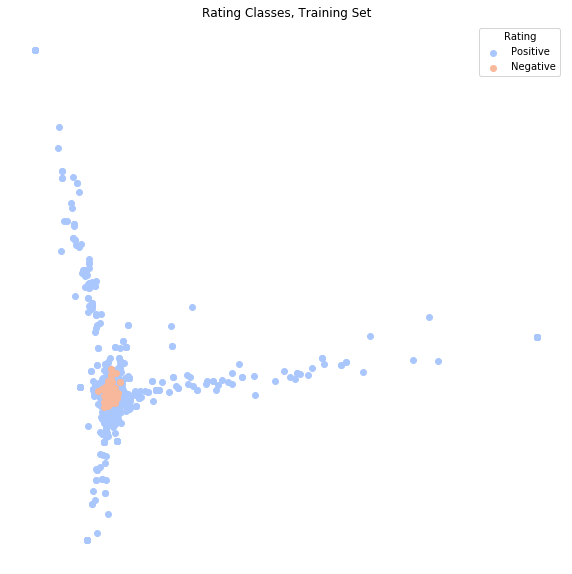

In [36]:
#plot the feature shape of this data
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot positive rating
a = np.stack(train_data_df[train_data_df['category'].eq('Positive')]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "Positive")

#Plot negative rating
a = np.stack(train_data_df[train_data_df['category'].eq('Negative')]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "Negative")
    
ax.legend(loc = 'upper right', title = 'Rating')
plt.title('Rating Classes, Training Set')
plt.show()

As we could see above, the feature space is irregular, nested and non-linear saparated, which is very close to the email spam real dataset. Therefore, I predict that Naive Bayes classifer might perform better here.

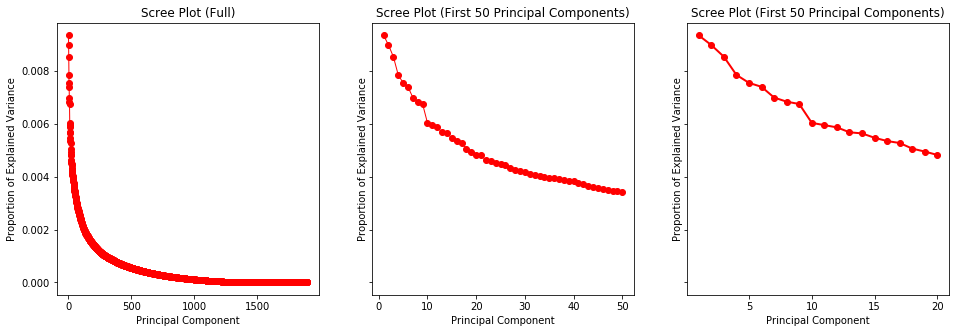

In [39]:
#Exame the number of components we should extract from PCA
n = min(TFVects.shape[0],TFVects.shape[1])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

As we could see from the figures above, 10 components is a turning point, while till 50, the remained explained variance proportion is still high and decreasing slowly. So, we will try 10 components first for logistic regression: 

In [78]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [164]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.9257936507936508

In [123]:
#define the evaluation scores function
def calculate_score(model,data_feature,data_category,method_des):
    precision_score=[]
    recall_score=[]
    f1_score=[]
    method=[]
    AUC=[]
    predictions = model.predict(np.stack(data_feature, axis=0))
    preds = [True if (c == 'Positive') else False for c in predictions]
    acts = [True if (c == 'Positive') else False for c in data_category]
    precision_score.append(sklearn.metrics.precision_score(acts, preds))
    recall_score.append(sklearn.metrics.recall_score(acts, preds))
    f1_score.append(sklearn.metrics.f1_score(acts, preds))
    AUC.append(sklearn.metrics.roc_auc_score(acts, preds))
    method.append(method_des)
    
    preds = [True if (c == 'Negative') else False for c in predictions]
    acts = [True if (c == 'Negative') else False for c in data_category]
    precision_score.append(sklearn.metrics.precision_score(acts, preds))
    recall_score.append(sklearn.metrics.recall_score(acts, preds))
    f1_score.append(sklearn.metrics.f1_score(acts, preds))
    AUC.append(sklearn.metrics.roc_auc_score(acts, preds))
    method.append(method_des)
    classes=['Positive','Negative']
    pd_calculate=pandas.DataFrame({'Precision':precision_score,'Recall':recall_score,'F1':f1_score, 'AUC':AUC, 'Methods':method},index=classes)
    pd_calculate.index.rename('Category', inplace=True)
    return pd_calculate

In [119]:
#plot confusion matrix
def confusion_matrix(model,data_feature,data_category,method_des):
    predictions =model.predict(np.stack(data_feature, axis=0))
    mat = sklearn.metrics.confusion_matrix(predictions, data_category)
    seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                        xticklabels=data_category.unique(), yticklabels=data_category.unique())
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title("Confusion Matrix")
    plt.show()
    plt.close()

In [121]:
def plot_ROC_curve(model,data_feature,data_category,method_des):
    clf=model
    classes = clf.classes_
    try:
        probs = clf.predict_proba(np.stack(data_feature, axis=0))
    except AttributeError:
        print("The {} classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.".format(type(clf)))
        return
    predictions = clf.predict(np.stack(data_feature, axis=0))

    #setup axis for plotting
    fig, ax = plt.subplots(figsize = (10,10))

    #We can return the AUC values, in case they are useful
    aucVals = []
    for classIndex, className in enumerate(classes):        #Setup binary classes
        truths = [1 if c == className else 0 for c in data_category]
        predict = [1 if c == className else 0 for c in predictions]
        scores = probs[:, classIndex]

        #Get the ROC curve
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(truths, scores)
        auc = sklearn.metrics.auc(fpr, tpr)
        aucVals.append(auc)

        #Plot the class's line
        ax.plot(fpr, tpr, label = "{} (AUC ${:.3f}$)".format(str(className).split(':')[0], auc))

    #Make the plot nice, then display it
    ax.set_title('Receiver Operating Characteristics')
    plt.plot([0,1], [0,1], color = 'k', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = 'lower right')
    plt.show()
    plt.close()

In [137]:
#train dataset evaluation
pd_alexa_train_lg=calculate_score(logistic,train_data_df['pca_reduced_10'], train_data_df['category'],'Logistic_PCA10')
pd_alexa_train_lg

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.925794,1.0,0.961467,0.5,Logistic_PCA10
Negative,0.000000,0.0,0.000000,0.5,Logistic_PCA10


As we could see from the table above, the result is really unideal that no negative category is correctly assigned.

In [138]:
pd_alexa_train=pd_alexa_train_lg

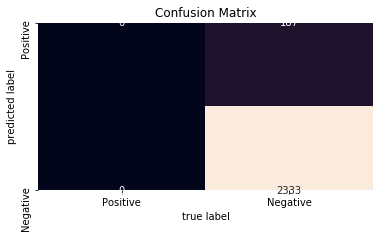

In [120]:
confusion_matrix(logistic,train_data_df['pca_reduced_10'], train_data_df['category'],'Logistic_PCA10')

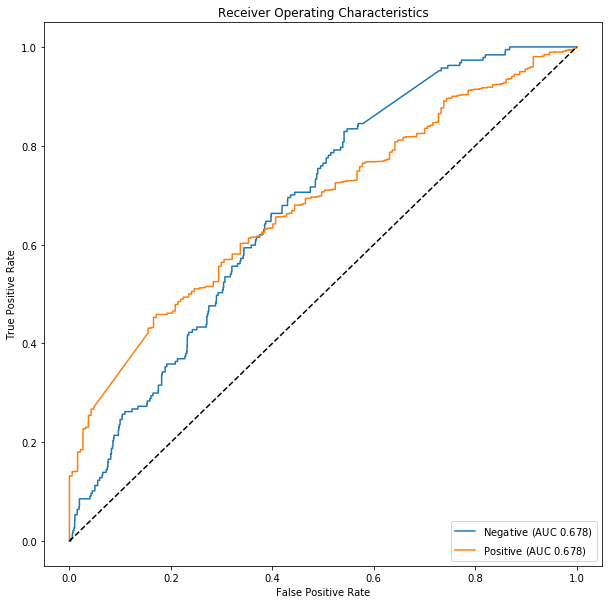

In [122]:
plot_ROC_curve(logistic,train_data_df['pca_reduced_10'], train_data_df['category'],'Logistic_PCA10')

In [304]:
#Try with the test dataset
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['reviews'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.8888888888888888

In [139]:
#test_evaluation
pd_alexa_test_lg=calculate_score(logistic,test_data_df['pca_reduced_10'], test_data_df['category'],'Logistic_PCA10')
pd_alexa_test_lg

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.0,0.941176,0.5,Logistic_PCA10
Negative,0.000000,0.0,0.000000,0.5,Logistic_PCA10


The result is same with training, no negative category is assigned and predicted.

In [140]:
pd_alexa_test=pd_alexa_test_lg

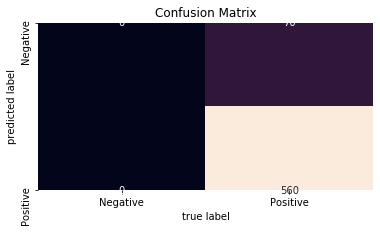

In [165]:
confusion_matrix(logistic,test_data_df['pca_reduced_10'], test_data_df['category'],'Logistic_PCA10')

Now, try with the L1 penalty with all TF-IDF features calculated: 

In [128]:
#L1, try with the L1 penalty
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9261904761904762


In [129]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8888888888888888


In [143]:
#print the evluation score for train
pd_alexa_train_lgl1=calculate_score(logistic_l1,train_data_df['vect'], train_data_df['category'],'Logistic_L1')
pd_alexa_train_lgl1

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.926161,1.000000,0.961665,0.502674,Logistic_L1
Negative,1.000000,0.005348,0.010638,0.502674,Logistic_L1


From the evaluation tables above and below, we could see that logistic regression performs worse in this dataset for positive and negative label that it could very rarely spot negative cases, nevertheless to say transforming to test dataset. The non-linear and unseparable nature of feature space might by the underlying key reasons of why logistic regression failed.

In [144]:
#print the evluation score for test
pd_alexa_test_lgl1=calculate_score(logistic_l1,test_data_df['vect'], test_data_df['category'],'Logistic_L1')
pd_alexa_test_lgl1

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.0,0.941176,0.5,Logistic_L1
Negative,0.000000,0.0,0.000000,0.5,Logistic_L1


In [148]:
#aggregate all train evaluation scores and test evalutaion scores
pd_alexa_train=pandas.concat([pd_alexa_train_lgl1,pd_alexa_train])
pd_alexa_train

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.926161,1.000000,0.961665,0.502674,Logistic_L1
Negative,1.000000,0.005348,0.010638,0.502674,Logistic_L1
Positive,0.925794,1.000000,0.961467,0.500000,Logistic_PCA10
Negative,0.000000,0.000000,0.000000,0.500000,Logistic_PCA10


In [149]:
pd_alexa_test=pandas.concat([pd_alexa_test_lgl1,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.0,0.941176,0.5,Logistic_L1
Negative,0.000000,0.0,0.000000,0.5,Logistic_L1
Positive,0.888889,1.0,0.941176,0.5,Logistic_PCA10
Negative,0.000000,0.0,0.000000,0.5,Logistic_PCA10


# Naive Bayes Classifier

* Now move on to naive bayes classifier:

In [305]:
#fit the model
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [306]:
#calculate the accuracy score
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9075396825396825
Testing:
0.8809523809523809


In [151]:
#plot the evluation table
pd_alexa_train_nb=calculate_score(naiveBayes,train_data_df['vect'], train_data_df['category'],'Naive Bayes')
pd_alexa_train_nb

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.950257,0.949850,0.950054,0.664765,Naive Bayes
Negative,0.377660,0.379679,0.378667,0.664765,Naive Bayes


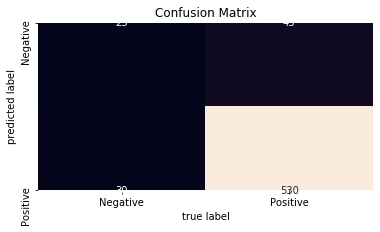

In [161]:
confusion_matrix(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')

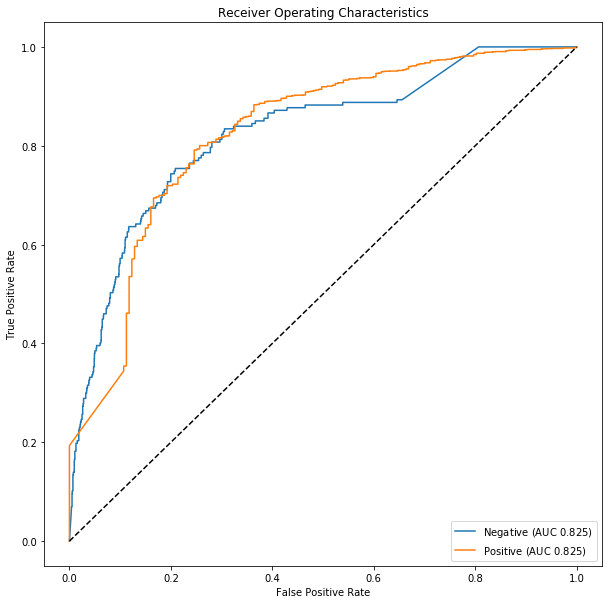

In [166]:
plot_ROC_curve(naiveBayes,train_data_df['vect'], train_data_df['category'],'Naive Bayes')

In [49]:
#try with Test Dataset
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [307]:
#Plot evaluation score
pd_alexa_test_nb=calculate_score(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')
pd_alexa_test_nb

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes


From the evalution table, we could see that naive bayes improves in correctly predicting negative categories and also general AUC score; while generally, it is still biased towards positive.

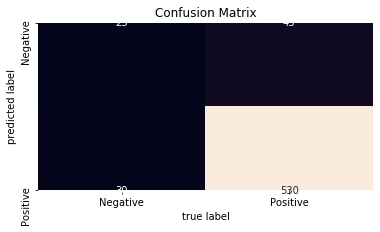

In [159]:
confusion_matrix(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')

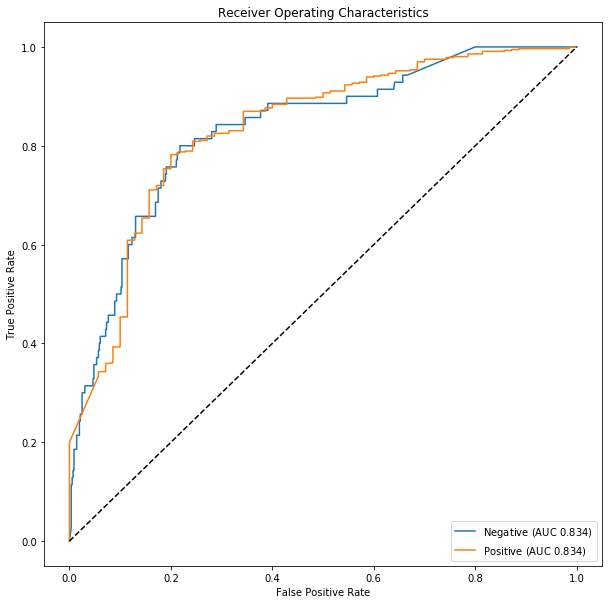

In [160]:
plot_ROC_curve(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


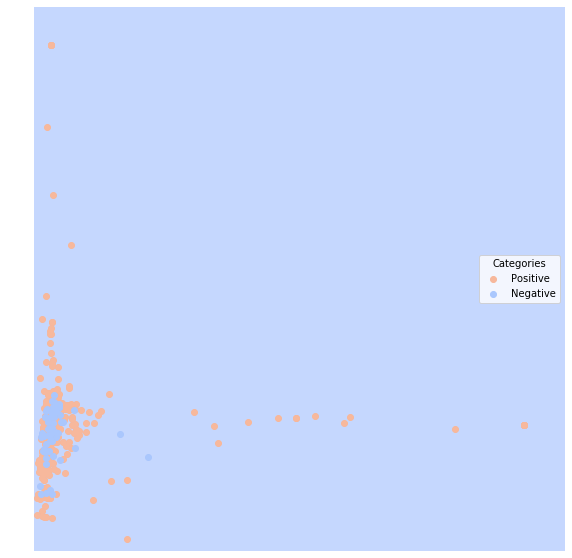

In [158]:
lucem_illud_2020.plotregions(naiveBayes, test_data_df)

In [157]:
#Aggregate the train and test evluation
pd_alexa_train=pandas.concat([pd_alexa_train_nb,pd_alexa_train])
pd_alexa_test=pandas.concat([pd_alexa_test_nb,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes
Positive,0.888889,1.000000,0.941176,0.500000,Logistic_L1
Negative,0.000000,0.000000,0.000000,0.500000,Logistic_L1
Positive,0.888889,1.000000,0.941176,0.500000,Logistic_PCA10


From the table above, we could more clearly see that Naive Bayes improves a lot in predicting negative labels and also the general acuracy and AUC score of the model, since naive bayes relies on less on the shape and linear relationship in the feature space, compared with logistic regression.

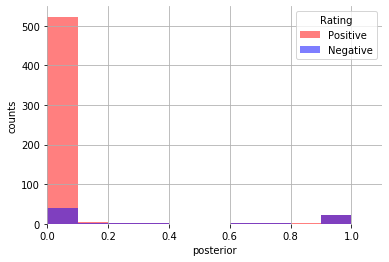

In [69]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq("Positive")]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'Positive', color = 'red')
test_data_df[test_data_df['category'].eq("Negative")]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'Negative', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Rating")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [308]:
#fit in a tree model
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=20,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [309]:
#evaluate its performance of training
lucem_illud_2020.evaluateClassifier(clf_tree,train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Positive,0.038889,0.737968,0.959687,0.959687,1.000000
Negative,0.038889,0.737968,1.000000,0.514825,0.475936


In [310]:
pd_alexa_train_tree=calculate_score(clf_tree,train_data_df['vect'], train_data_df['category'],'Decision_Tree')
pd_alexa_train_tree

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.959687,1.000000,0.979429,0.737968,Decision_Tree
Negative,1.000000,0.475936,0.644928,0.737968,Decision_Tree


Simply applying a decision tree model, the prediction of negative label and also the overall prediction (accuracy and AUC scores) improves dramatically.

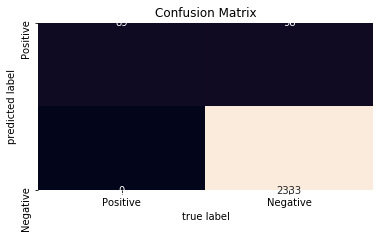

In [233]:
confusion_matrix(clf_tree,train_data_df['vect'], train_data_df['category'],'Decision_Tree')

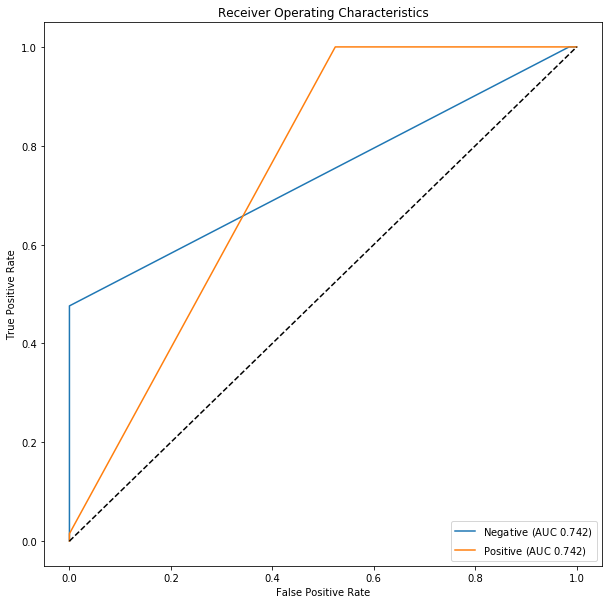

In [234]:
plot_ROC_curve(clf_tree,train_data_df['vect'], train_data_df['category'],'Decision_Tree')

In [235]:
# Examine the test dataset
pd_alexa_test_tree=calculate_score(clf_tree,test_data_df['vect'], test_data_df['category'],'Decision_Tree')
pd_alexa_test_tree

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.914474,0.992857,0.952055,0.625,Decision_Tree
Negative,0.818182,0.257143,0.391304,0.625,Decision_Tree


AUC scores did not improve for decision tree classifier, while the accuracy of negative categories increase dramastically.

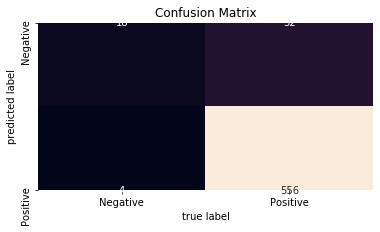

In [236]:
confusion_matrix(clf_tree,test_data_df['vect'], test_data_df['category'],'Decision_Tree')

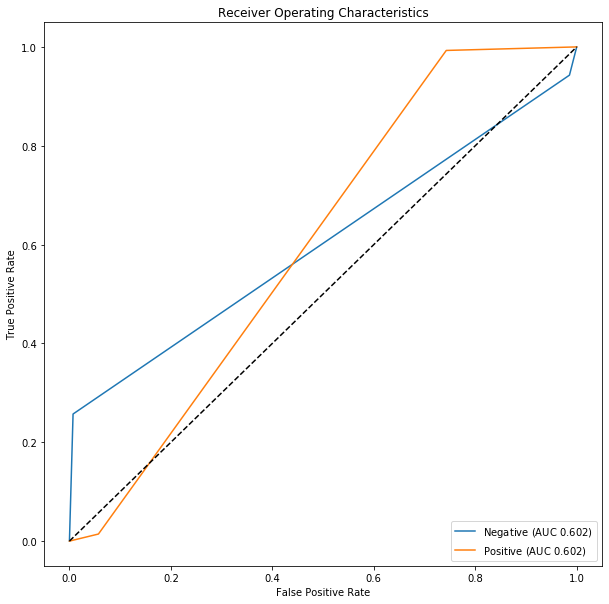

In [237]:
plot_ROC_curve(clf_tree,test_data_df['vect'], test_data_df['category'],'Decision_Tree')

In [312]:
#aggregate the evaluation results of decision tree
pd_alexa_train=pandas.concat([pd_alexa_train_tree,pd_alexa_train])
pd_alexa_train
pd_alexa_test=pandas.concat([pd_alexa_test_tree,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.914474,0.992857,0.952055,0.625000,Decision_Tree
Negative,0.818182,0.257143,0.391304,0.625000,Decision_Tree
Positive,0.916256,0.996429,0.954662,0.633929,Random Forest
Negative,0.904762,0.271429,0.417582,0.633929,Random Forest
Positive,0.917081,0.987500,0.950989,0.636607,Neural Network
Negative,0.740741,0.285714,0.412371,0.636607,Neural Network
Positive,0.888889,1.000000,0.941176,0.500000,kNN
Negative,0.000000,0.000000,0.000000,0.500000,kNN
Positive,0.914474,0.992857,0.952055,0.625000,Decision_Tree


To examine whether the tree is overfit or not:

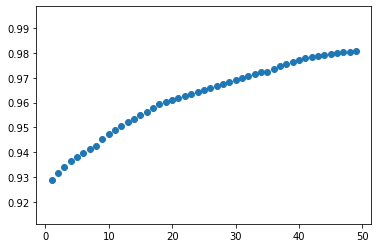

In [213]:
# Further examine to which layer we should trim the tree
depthvec = []
scorevec = []
for i in range(1,50):  #higher level
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(train_data_df['category'], tree2.predict(np.stack(train_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

From the figure above, we could see that the tree is not overfit and there is still information missed and the model could be improved, based on the current tree layers. Therefore, I further train a forest with larger tree layers-50 and examine its results:

In [218]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=50) #Create an instance of our decision tree classifier.
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [219]:
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=50,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [222]:
pd_alexa_train_forest=calculate_score(bag,train_data_df['vect'], train_data_df['category'],'Random Forest')
pd_alexa_train_forest

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.986887,1.000000,0.993400,0.917112,Random Forest
Negative,1.000000,0.834225,0.909621,0.917112,Random Forest


In [224]:
pd_alexa_test_forest=calculate_score(bag,test_data_df['vect'], test_data_df['category'],'Random Forest')
pd_alexa_test_forest

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.916256,0.996429,0.954662,0.633929,Random Forest
Negative,0.904762,0.271429,0.417582,0.633929,Random Forest


From the table, we could see that, the bagging method with forest further improves the overall performance (Precision, F1 and AUC scores) of classification  and negative prediction. However, considering the trees of such high level of layers combined, this improvement is very small (AUC from 0.625/decision tree -> 0.633/random forest), even smaller than the results of naive bayes classifer.

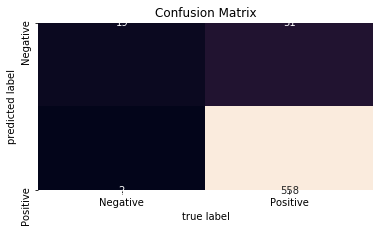

In [226]:
lucem_illud_2020.plotConfusionMatrix(bag, test_data_df)

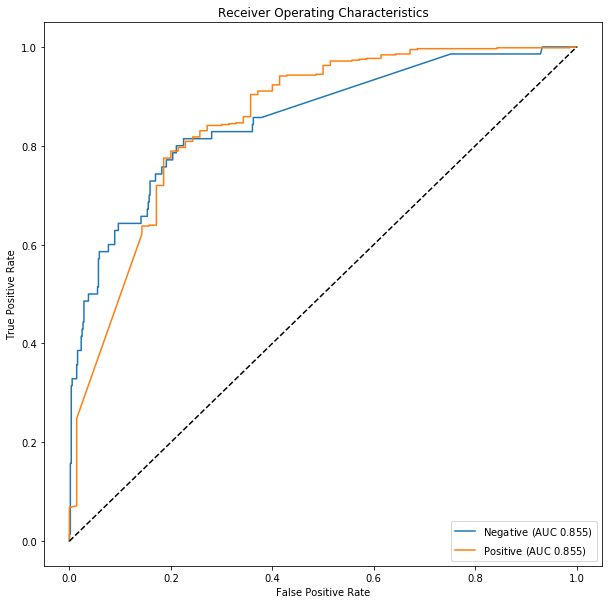

In [227]:
plot_ROC_curve(bag,test_data_df['vect'], test_data_df['category'],'Random Forest')

Overall, 1) logistic regression performs very unideal in classifying positive and negative posts, especially failed to predict negative ones; since it is hard to capture linear relationship in the dataset; 2) naive bayes classifier improves the overall performance (higher AUC score) of the model, it still performs badly on negative cases; since naive bayes relies on conditional probability, the relative less cases and observation of negative ones might bring to this result; 3) For decision tree and random forest classifier, with more detailed consideration of information contained in each model and advanced bagging technique, they improves the negative category prediction greatly, while the overall performance stays and even drops a little bit. 

In [313]:
#aggregate the evaluation data of all models
pd_alexa_train=pandas.concat([pd_alexa_train_forest,pd_alexa_train])
pd_alexa_train
pd_alexa_test=pandas.concat([pd_alexa_test_forest,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.914474,0.992857,0.952055,0.625000,Decision_Tree
Negative,0.818182,0.257143,0.391304,0.625000,Decision_Tree
Positive,0.916256,0.996429,0.954662,0.633929,Random Forest
Negative,0.904762,0.271429,0.417582,0.633929,Random Forest
Positive,0.917081,0.987500,0.950989,0.636607,Neural Network
Negative,0.740741,0.285714,0.412371,0.636607,Neural Network
Positive,0.888889,1.000000,0.941176,0.500000,kNN
Negative,0.000000,0.000000,0.000000,0.500000,kNN
Positive,0.914474,0.992857,0.952055,0.625000,Decision_Tree


## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [239]:
#fit a kNN classifier
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [240]:
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [242]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_data_df)

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Positive,0.074206,0.5,0.925794,0.925794,1.0
Negative,0.074206,0.5,0.000000,0.074206,0.0


In [245]:
#plot evaluation table
pd_alexa_train_kNN=calculate_score(clf_knearest,train_data_df['vect'], train_data_df['category'],'kNN')
pd_alexa_train_kNN

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.925794,1.0,0.961467,0.5,kNN
Negative,0.000000,0.0,0.000000,0.5,kNN


In [247]:
#plot evluation table for test data
pd_alexa_test_kNN=calculate_score(clf_knearest,test_data_df['vect'], test_data_df['category'],'kNN')
pd_alexa_test_kNN

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.0,0.941176,0.5,kNN
Negative,0.000000,0.0,0.000000,0.5,kNN


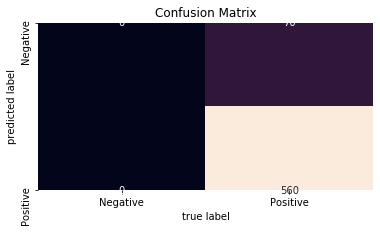

In [248]:
confusion_matrix(clf_knearest,test_data_df['vect'], test_data_df['category'],'kNN')

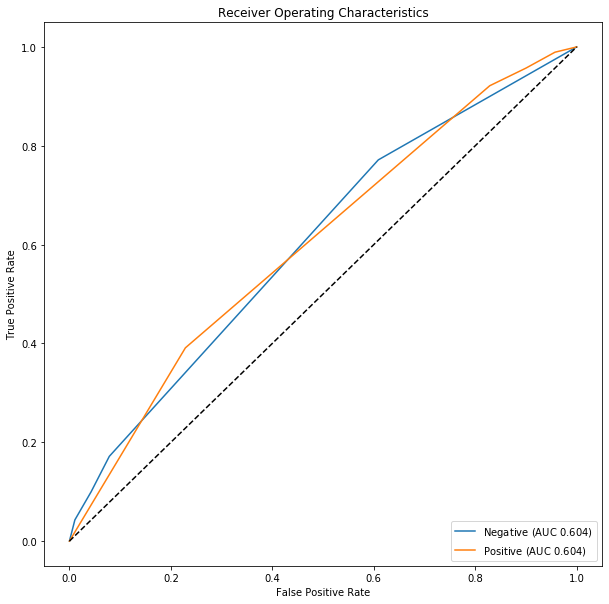

In [250]:
plot_ROC_curve(clf_knearest,test_data_df['vect'], test_data_df['category'],'kNN')

In [253]:
#aggregate the results
pd_alexa_train=pandas.concat([pd_alexa_train_kNN,pd_alexa_train])
pd_alexa_train
pd_alexa_test=pandas.concat([pd_alexa_test_kNN,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.000000,0.941176,0.500000,kNN
Negative,0.000000,0.000000,0.000000,0.500000,kNN
Positive,0.914474,0.992857,0.952055,0.625000,Decision_Tree
Negative,0.818182,0.257143,0.391304,0.625000,Decision_Tree
Positive,0.916256,0.996429,0.954662,0.633929,Random Forest
Negative,0.904762,0.271429,0.417582,0.633929,Random Forest
Positive,0.975610,1.000000,0.987654,0.900000,Decision_Tree
Negative,1.000000,0.800000,0.888889,0.900000,Decision_Tree
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes


From the table and figures, we could see that kNN also does not perform well on this dataset, also worse on negative cases, since it is very hard to separate the cluster of negative from positive ones and draw a boundary according to the nearest surronding points.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


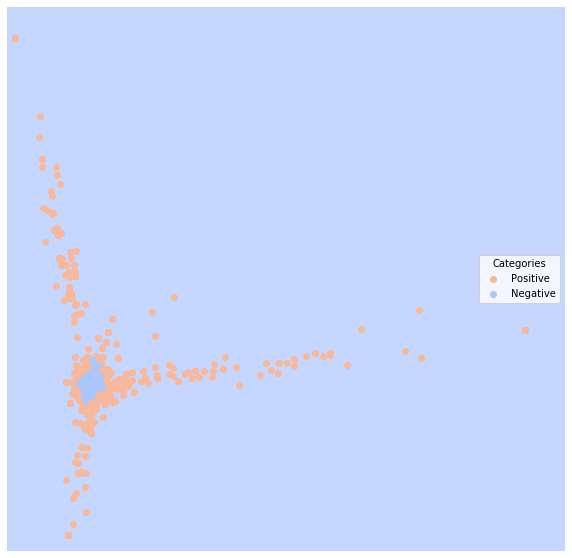

In [314]:
lucem_illud_2020.plotregions(clf_knearest, train_data_df)

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [252]:
#Fit a neural network model
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [255]:
#present evluation table for training dataset
pd_alexa_train_nn=calculate_score(clf_nn,train_data_df['vect'], train_data_df['category'],'Neural Network')
pd_alexa_train_nn

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.991493,0.999143,0.995303,0.946095,Neural Network
Negative,0.988166,0.893048,0.938202,0.946095,Neural Network


In [256]:
#present evluation table for test dataset
pd_alexa_test_nn=calculate_score(clf_nn,test_data_df['vect'], test_data_df['category'],'Neural Network')
pd_alexa_test_nn

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.917081,0.987500,0.950989,0.636607,Neural Network
Negative,0.740741,0.285714,0.412371,0.636607,Neural Network


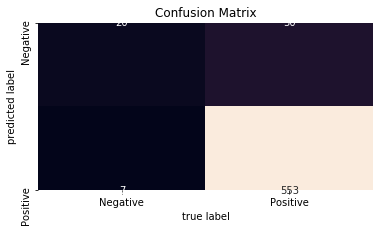

In [257]:
confusion_matrix(clf_nn,test_data_df['vect'], test_data_df['category'],'Neural Network')

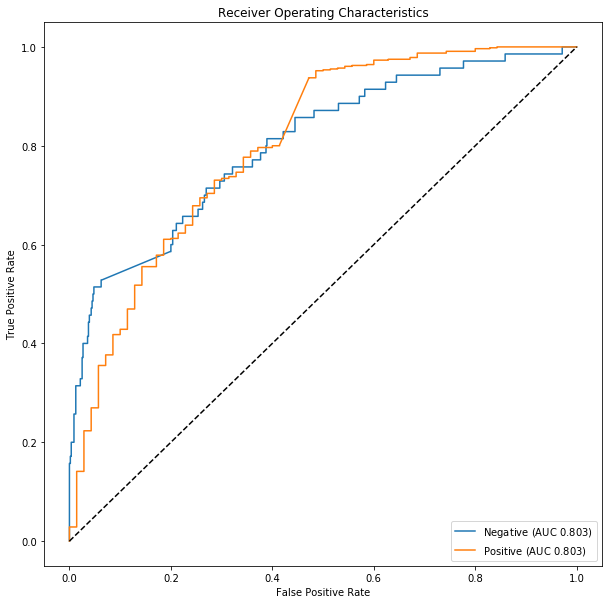

In [258]:
plot_ROC_curve(clf_nn,test_data_df['vect'], test_data_df['category'],'Neural Network')

In [259]:
#aggregate results of all models
pd_alexa_train=pandas.concat([pd_alexa_train_nn,pd_alexa_train])
pd_alexa_train
pd_alexa_test=pandas.concat([pd_alexa_test_nn,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.917081,0.987500,0.950989,0.636607,Neural Network
Negative,0.740741,0.285714,0.412371,0.636607,Neural Network
Positive,0.888889,1.000000,0.941176,0.500000,kNN
Negative,0.000000,0.000000,0.000000,0.500000,kNN
Positive,0.914474,0.992857,0.952055,0.625000,Decision_Tree
Negative,0.818182,0.257143,0.391304,0.625000,Decision_Tree
Positive,0.916256,0.996429,0.954662,0.633929,Random Forest
Negative,0.904762,0.271429,0.417582,0.633929,Random Forest
Positive,0.975610,1.000000,0.987654,0.900000,Decision_Tree


From the tables and figure above, we could see that neural network performs well both in terms of overall acurracy, F1 and AUC scores, also better for the negative label prediction, compared with kNN (clear cluster with less noise) and logistic regression (linear relationship), which all held assumptions about feature spaces which this dataset violates; and also outperforms Naive Bayes that Naive Bayes performs worse on category with smaller number of cases. 

However, neural network does not outperform random forest and decision tree in this model, which is very interesting. The calculation procedure between these two lines of classifiers are quite different, while both are advanced. Some calcualtion might be more suitable for certain type of dataset, while with my current knowledge, it is hard to answer the question about which dataset is more suitable for decison tree and versa.